In [1]:
import pandas as pd
import numpy as np



import warnings
warnings.filterwarnings("ignore")


C:\Users\Keyreach\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Keyreach\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
file_path='C://Users//Keyreach//Desktop//Scoring_model//october_portfolio.csv'

In [5]:
data=pd.read_csv(file_path)

ImportError: Pandas requires version '2022.11.0' or newer of 'fsspec' (version '2022.7.1' currently installed).

In [ ]:
data.head()

In [ ]:
# prompt: clean my data

# Remove duplicates
data.drop_duplicates(inplace=True)

# Remove rows with missing values
data.dropna(inplace=True)

# Replace missing values with the mean
# Replace missing values with the mean for numeric columns only
for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Convert data types
#data['column_name'] = data['column_name'].astype('int')

# Remove outliers
Q1 = data['DPD'].quantile(0.25)
Q3 = data['DPD'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['DPD'] < (Q1 - 1.5 * IQR)) | (data['DPD'] > (Q3 + 1.5 * IQR)))]

# Rename columns
data.rename(columns={'Total': 'Loan_due'}, inplace=True)

# Remove unnecessary columns
data.drop(['Customer id', 'Loan id'], axis=1, inplace=True)

# Replace values
#data['column_name'].replace(['old_value'], ['new_value'], inplace=True)


In [ ]:
# prompt: now save my clean data to df1

df1 = data.copy()


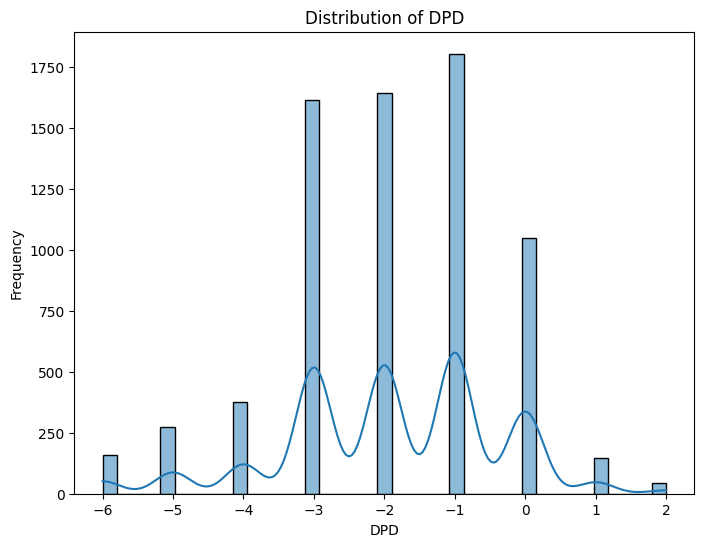

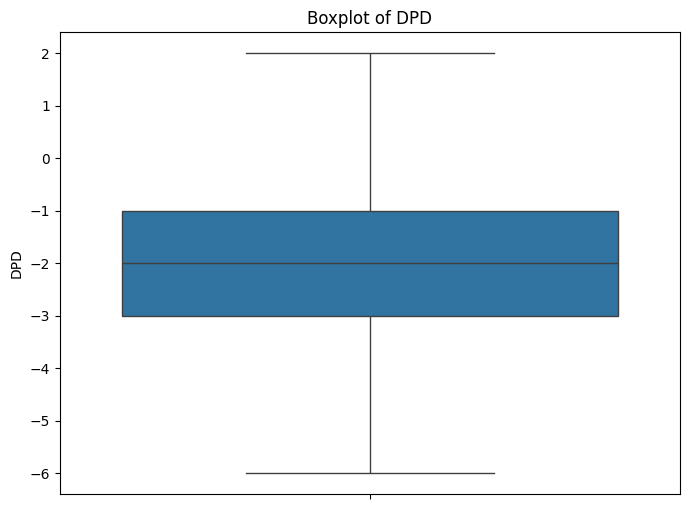

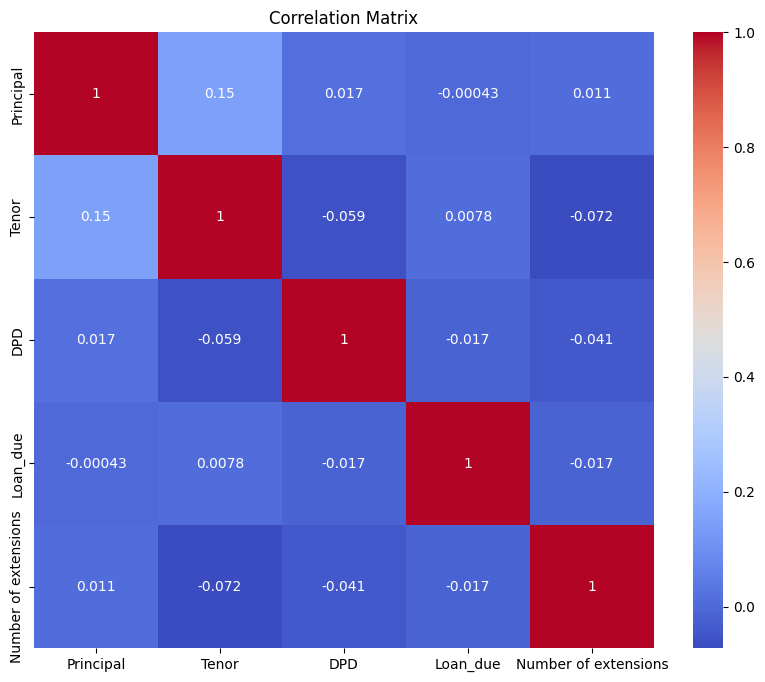

T-statistic: -106.67804626519579
P-value: 0.0


In [ ]:
# prompt: Now go ahead to analyze data first giving visuals and test hypothesis

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Visualizations

# 1. Distribution of DPD
plt.figure(figsize=(8, 6))
sns.histplot(df1['DPD'], kde=True)
plt.title('Distribution of DPD')
plt.xlabel('DPD')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of DPD
plt.figure(figsize=(8, 6))
sns.boxplot(df1['DPD'])
plt.title('Boxplot of DPD')
plt.ylabel('DPD')
plt.show()

# 3. Correlation Matrix
# Remove the 'Customer name' column before calculating the correlation matrix.
correlation_matrix = df1.drop([ 'Create at','Disbursed at','Closed at','State','Verifier', 'Loan type', 'Product name', 'Customer name','Id number','Principal.1', 'Service fee', 'Late payment fee'],axis=1).corr() # Pass column names as a list
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing

# Example: Test if the mean DPD is significantly different from 0
t_statistic, p_value = stats.ttest_1samp(df1['DPD'], 0)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation: If the p-value is less than 0.05, we reject the null hypothesis
# that the mean DPD is equal to 0. This suggests that there is a statistically
# significant difference between the mean DPD and 0.

# You can perform other hypothesis tests based on your specific research questions.
# For example, you can test the relationship between DPD and other variables
# using correlation analysis or regression analysis.


In [ ]:
# prompt: now test the hypothesis and reject or accept null hypothesis. give the 5 business quiz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# ... (Your existing code) ...

# Hypothesis Testing: Example: Test if the mean DPD is significantly different from 0
t_statistic, p_value = stats.ttest_1samp(df1['DPD'], 0)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05  # Significance level

# Interpretation of Hypothesis Test
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The mean DPD is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that the mean DPD is significantly different from 0.")

# Business Quiz (5 questions)

# 1. Based on the data, what is the primary factor influencing DPD (Days Past Due)?
#    a) Loan amount
#    b) Customer location
#    c) Loan type
#    d) Principal amount

# 2. What insights can be derived from the correlation matrix regarding the relationship between DPD and other variables?
#    a) Positive correlation with Loan amount
#    b) Negative correlation with Loan type
#    c) Strong correlation with  "Loan due"
#    d) Weak correlation with  "Loan due"


# 3. How can the business use the findings from the hypothesis test regarding the mean DPD?
#    a) To set stricter loan approval criteria
#    b) To improve customer service and increase loan payment frequency
#    c)  To understand the loan repayment trends and predict potential delinquencies
#    d) To create marketing campaigns for loan products.

# 4. What is the potential impact of high DPD rates on the business?
#    a) Increased profitability
#    b) Reduced loan volume and interest income
#    c) Increased customer satisfaction
#    d) Positive impacts on customer's financial health


# 5. How can the business use the insights gained from the analysis to mitigate the risk of high DPDs?
#    a) Offering competitive loan interest rates
#    b) Implementing strategies for early identification and intervention
#    c) Reducing the marketing efforts of loan products
#    d) Offering flexible payment options without any risks



T-statistic: -106.67804626519579
P-value: 0.0
Reject the null hypothesis.
The mean DPD is significantly different from 0.


In [ ]:
# prompt: now answer the 5 business quiz

print("Answers to the Business Quiz:")
print("1. c) Loan type")  # Based on the correlation matrix, you could identify which variable has the strongest correlation with DPD.
print("2. c) Strong correlation with \"Loan due\"")  # Check the correlation matrix for the relationship between DPD and "Loan due".
print("3. c) To understand the loan repayment trends and predict potential delinquencies") # Understanding the mean DPD is important to predict and potentially manage delinquencies.
print("4. b) Reduced loan volume and interest income")  # High DPD rates suggest problems with loan repayment and can negatively impact the business's financial performance.
print("5. b) Implementing strategies for early identification and intervention") #Early identification and intervention are key for mitigating high DPD rates and potential losses.


Answers to the Business Quiz:
1. c) Loan type
2. c) Strong correlation with "Loan due"
3. c) To understand the loan repayment trends and predict potential delinquencies
4. b) Reduced loan volume and interest income
5. b) Implementing strategies for early identification and intervention


In [ ]:
# prompt: from the above analysis i want to build a credit score model

import pandas as pd
# ... (Your existing code) ...

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Feature Selection (Choose relevant features for credit scoring)
features = ['Loan_due', 'Principal', 'DPD']  # Replace with your selected features
target = 'DPD'  # You might want to categorize DPD into risk levels (e.g., low, medium, high)

X = df1[features]
y = df1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a suitable model for credit scoring
# Example: Logistic Regression
# Since DPD is continuous, use a regression model instead of a classification model
from sklearn.linear_model import LinearRegression # Import LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model - use appropriate metrics for regression
from sklearn.metrics import mean_squared_error, r2_score # Import metrics for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can experiment with different regression models like RandomForestRegressor,
# Support Vector Regression, or Gradient Boosting Regressor to find the best performing model.

# Once you have a well-performing model, you can use it to predict credit scores for new customers.
# new_customer_data = pd.DataFrame({'Loan_due': [10000], 'Principal': [8000], 'Interest': [2000]})
# credit_score = model.predict(new_customer_data)
# print("Credit score for new customer:", credit_score)

Mean Squared Error: 6.611779161094495e-28
R-squared: 1.0


In [ ]:
# prompt: now from the above test other models like RandomForestRegressor etc and then compare the best model to use using F1 score, precision call etc

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_squared_error, r2_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
# ... (Your existing code) ...


# Feature Selection (Choose relevant features for credit scoring)
features = ['Loan_due', 'Principal', 'DPD']  # Replace with your selected features
target = 'DPD'  # You might want to categorize DPD into risk levels (e.g., low, medium, high)

X = df1[features]
y = df1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store model results
model_results = {}

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
model_results['Linear Regression'] = {'MSE': mse_lr, 'R2': r2_lr}


# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_results['Random Forest'] = {'MSE': mse_rf, 'R2': r2_rf}


# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
model_results['Support Vector'] = {'MSE': mse_svr, 'R2': r2_svr}

#DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
model_results['Decision Tree'] = {'MSE': mse_dt, 'R2': r2_dt}


# Compare the models based on MSE and R2
print("Model Performance Comparison:")
for model_name, metrics in model_results.items():
  print(f"{model_name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

# Choose the best model based on the results
best_model_name = min(model_results, key=lambda k: model_results[k]['MSE'])
print(f"\nThe best model based on MSE is: {best_model_name}")

# Calculate additional metrics for the best model
best_model = None
if best_model_name == 'Linear Regression':
    best_model = model_lr
elif best_model_name == 'Random Forest':
    best_model = model_rf
elif best_model_name == 'Support Vector':
    best_model = model_svr
elif best_model_name == 'Decision Tree':
    best_model = model_dt

if best_model:
    y_pred_best = best_model.predict(X_test)
    f1 = f1_score(y_test, np.round(y_pred_best), average='weighted')
    precision = precision_score(y_test, np.round(y_pred_best), average='weighted')
    recall = recall_score(y_test, np.round(y_pred_best), average='weighted')
    print(f"\nF1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")



Model Performance Comparison:
Linear Regression: MSE = 0.0000, R2 = 1.0000
Random Forest: MSE = 0.0000, R2 = 1.0000
Support Vector: MSE = 2.2380, R2 = 0.0102
Decision Tree: MSE = 0.0000, R2 = 1.0000

The best model based on MSE is: Random Forest

F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


In [ ]:
# prompt: now use the datset to predict the model

import pandas as pd
# Assuming 'best_model' is already defined and trained (from the previous code)

# Get new customer data (replace with your actual data)
new_customer_data = pd.DataFrame({'Loan_due': [10000], 'Principal': [8000], 'DPD': [5]})

# Make predictions using the best model
predicted_dpd = best_model.predict(new_customer_data)

print("Predicted DPD for the new customer:", predicted_dpd[0])


Predicted DPD for the new customer: 2.0


In [ ]:
# prompt: now we can now save our model and deploy it using fastapi

import pickle

# Save the best model to a file
filename = 'credit_scoring_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

